In [1]:
import osmnx as ox
import random
import lib
import numpy as np
from clustering import *

In [2]:
G = lib.load()
allHouses, allInfra = lib.getTaggedNodes(G)

In [3]:
# params
speed = 40 # km/h
maxTime = 20
maxDistance = 2000

houses = random.sample(allHouses, 100)
infra = random.choice(allInfra)

In [4]:
houses_coords = np.array([(G.nodes[h]['y'], G.nodes[h]['x']) for h in houses])
dist_matrix = np.array([[get_distance(p[0], p[1], pp[0], pp[1]) for pp in houses_coords] for p in houses_coords])

C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


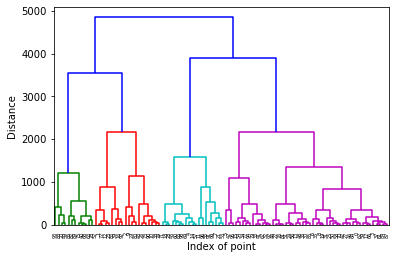

In [5]:
# 2.2)
plot_dendrogram(dist_matrix, truncate_mode='level')

k= 2!!!
[0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0]
2.3 a)
2.3 c, d)
centroid: 6143120, paths len= 573109.5600000003, tree weight= 102102.10899999998
2.3 a)
2.3 c, d)
centroid: 66823518, paths len= 305600.46300000005, tree weight= 70848.97200000008
2.3 b)


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


infra : 108714269, paths len= 23755.446, tree weight= 20920.874000000003


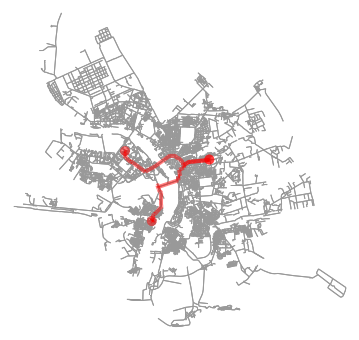




k= 3!!!
[1 0 0 1 2 1 1 2 1 0 0 2 0 1 2 1 0 1 2 1 0 2 1 0 1 1 0 1 2 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 2 1 1 1 0 1 1 0 2 1 2 1 2 1 1 2 1 1 0 1 2 1 1 0 2 1 2 0 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 2 0 0 1 1 2 1 2 2]
2.3 a)
2.3 c, d)
centroid: 66823518, paths len= 305600.46300000005, tree weight= 70848.97200000008
2.3 a)
2.3 c, d)
centroid: 62041016, paths len= 380949.95499999984, tree weight= 64748.32699999998
2.3 a)
2.3 c, d)


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


centroid: 55414936, paths len= 92273.02100000005, tree weight= 35534.678
2.3 b)
infra : 108714269, paths len= 25785.953999999998, tree weight= 23784.734000000015


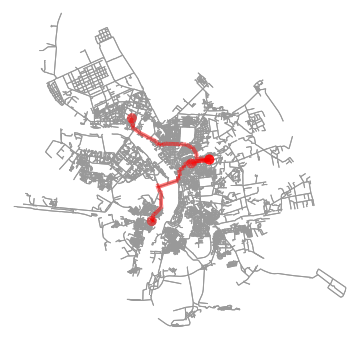




k= 5!!!
[1 0 0 1 2 4 1 2 1 0 0 2 0 1 2 4 0 1 2 1 3 2 1 0 1 1 0 1 2 0 1 1 4 4 4 1 1
 1 0 0 3 4 4 0 1 2 1 1 1 3 1 1 0 2 4 2 1 2 1 1 2 1 1 3 1 2 1 4 3 2 1 2 0 0
 0 3 1 4 3 4 0 1 3 0 1 1 3 1 3 3 0 2 0 3 4 4 2 4 2 2]
2.3 a)
2.3 c, d)
centroid: 102141552, paths len= 165910.725, tree weight= 53277.08700000004
2.3 a)
2.3 c, d)
centroid: 52025842, paths len= 243884.43199999994, tree weight= 50690.483
2.3 a)
2.3 c, d)


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


centroid: 55414936, paths len= 92273.02100000005, tree weight= 35534.678
2.3 a)
2.3 c, d)
centroid: 88506074, paths len= 110930.54000000004, tree weight= 37943.401000000034
2.3 a)
2.3 c, d)
centroid: 6143120, paths len= 86224.48900000002, tree weight= 31989.66899999999
2.3 b)
infra : 108714269, paths len= 51421.566, tree weight= 40319.58000000002


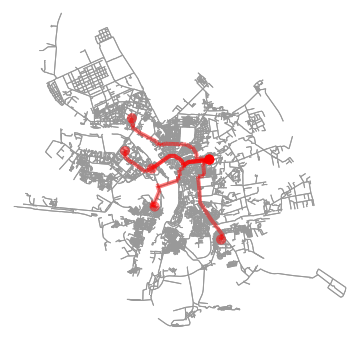

In [6]:
for k in [2, 3, 5]:
    print(f"k= {k}!!!")
    model = get_clusters(dist_matrix, k=k)
    print(model.labels_)
    centroids = []
    for c in range(k):
        # 2.3 a)
        print(f"2.3 a)")
        cluster_coords = houses_coords[model.labels_ == c]
        cluster = np.array(houses)[model.labels_ == c]
        centroids.append(cluster[get_centroid(cluster_coords)])
        # 2.3 c,d)
        print(f"2.3 c, d)")
        routes = lib.getFromSingleToManyPaths(G, centroids[-1], cluster, speed)
        paths_length = sum(route['length'] for route in routes.values())
        routes = [route['route'] for route in routes.values()]
        tree = lib.routes_to_tree(G, routes)
        print(f"centroid: {centroids[-1]}, paths len= {paths_length}, tree weight= {tree['weight']}")
    # 2.3 b)
    print(f"2.3 b)")
    routes = lib.getFromSingleToManyPaths(G, infra, centroids, speed)
    paths_length = sum(route['length'] for route in routes.values())
    routes = [route['route'] for route in routes.values()]
    tree = lib.routes_to_tree(G, routes)
    print(f"infra : {infra}, paths len= {paths_length}, tree weight= {tree['weight']}")

    ox.plot_graph_routes(G, routes, node_size=0)
    print(f"\n\n")